# Mask Processing for LOCA2

## Libraries

In [1]:
import numpy             as np
import xarray            as xr
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib        as mpl
import cf_xarray         as cfx
import cf_pandas         as cfp
import netCDF4 as ncf
print(ncf.__version__)
print(ncf.getlibversion())

import cartopy.crs       as ccrs
import cartopy.feature   as cfeature



1.6.5
4.9.2 of Dec 10 2023 17:27:37 $


## Open LOCA Masks and clean all purge all non-2d files.

In [2]:

awcf = xr.open_dataset(filename_or_obj = "./LOCA2_AWC.nc", 
                       engine          = "netcdf4")


demf = xr.open_dataset(filename_or_obj = "./LOCA2_DEM.nc", 
                       engine          = "netcdf4")

cdf = xr.open_dataset(filename_or_obj = "./LOCA2_CLIMDIV.nc", 
                       engine          = "netcdf4")

hucf = xr.open_dataset(filename_or_obj = "./LOCA2_HUC08.nc", 
                       engine          = "netcdf4")

xf       = xr.open_dataset(filename_or_obj = "./LOCA2_HMSLL.nc", 
                           engine          = "netcdf4")

xf["mass_content_of_water_in_soil"].values = awcf["LOCA2_AWC_MASK"].values
xf["surface_altitude"].values              = demf["LOCA2_DEM_MASK"].values
xf["LOCA2_CLIMDIV"].values                 = cdf["LOCA2_CLIMDIV_MASK"].values
xf["LOCA2_HUC08"].values                   = hucf["LOCA2_HUC08_MASK"].values




xf["LOCA2_MASK"]                    = xf[                   "LOCA2_MASK"].astype(dtype=np.int32, copy=True)
xf["LOCA2_HUC08"]                   = xf[                  "LOCA2_HUC08"].astype(dtype=np.int32, copy=True)
xf["LOCA2_CLIMDIV"]                 = xf[                "LOCA2_CLIMDIV"].astype(dtype=np.int32, copy=True)

xf["mass_content_of_water_in_soil"] = xf["mass_content_of_water_in_soil"].astype(dtype=np.float32, copy=True)
xf["surface_altitude"]              = xf[             "surface_altitude"].astype(dtype=np.float32, copy=True)


xf["LOCA2_CLIMDIV"] = xf["LOCA2_CLIMDIV"].where(xf["LOCA2_CLIMDIV"]  != 0)
xf["LOCA2_HUC08"]   = xf["LOCA2_HUC08"].where(xf["LOCA2_HUC08"] != 0)
xf["LOCA2_MASK"]    = xf["LOCA2_MASK"].where(xf["LOCA2_MASK"] != 0)



AWC_Grid  = xf["mass_content_of_water_in_soil"] 
CD_Grid   = xf["LOCA2_CLIMDIV"]
HUC_Grid  = xf["LOCA2_HUC08"]
Mask_Grid  = xf["LOCA2_MASK"]
HSFC_Grid  = xf["surface_altitude"]


xf = xf.drop_vars(["cell_area","cdnew",
                   "climdiv_state_code",
                   "fips_cd",
                   "huc02",
                   "huc04",
                   "huc06",
                   "state_fips",
                   "climdiv_name",
                   "climdiv_st_abrv",
                   "climdiv_st_name",
                   "climdiv_area_espg4269_m2",
                   "huc08_name",
                   "huc08_state",
                   "huc06_name",
                   "huc04_name",
                   "huc02_name",
                   "huc08_area_espg4269_m2",
                   "climdiv_area_for_mass_content_of_water_in_soil",
                   "climdiv_area_for_surface_elevation",
                   "climdiv_mean_mass_content_of_water_in_soil",
                   "climdiv_mean_surface_elevation",
                   "climdiv_standard_deviation_mass_content_of_water_in_soil",
                   "climdiv_standard_deviation_surface_elevation",
                   "huc08_area_for_mass_content_of_water_in_soil",
                   "huc08_area_for_surface_elevation",
                   "huc08_mean_mass_content_of_water_in_soil",
                   "huc08_mean_surface_elevation",
                   "huc08_standard_deviation_mass_content_of_water_in_soil",
                   "huc08_standard_deviation_surface_elevation",
                   "huc08_mean_longitude",
                   "huc08_mean_latitude",
                   "climdiv_mean_longitude",
                   "climdiv_mean_latitude"])

xf = xf.drop_dims(["climdiv","huc08"])

xf = xf.cf.add_bounds(["lon","lat"], output_dim='bnds')

xf["lat_bounds"].attrs["description"] = "Latitude Grid Bounds"
xf["lat_bounds"].attrs["long_name"] = "Latitude Grid Bounds"
xf["lat_bounds"].attrs["units"] = "degrees_north"
xf["lat_bounds"].attrs["standard_name"] = "latitude"

xf["lon_bounds"].attrs["description"] = "Longitude Grid Bounds"
xf["lon_bounds"].attrs["long_name"] = "Longitude Grid Bounds"
xf["lon_bounds"].attrs["units"] = "degrees_east"
xf["lon_bounds"].attrs["standard_name"] = "longitude"


xf.attrs["Conventions"] = "CF-1.11"
xf.attrs["title"]       = "LOCA2 Dataset Masks and Tabular Metadata"


xf

/opt/miniconda3/lib/python3.12/site-packages/xarray/core/duck_array_ops.py:216: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


<xarray.Dataset> Size: 14MB
Dimensions:                        (lat: 474, lon: 944, bnds: 2)
Coordinates:
  * lon                            (lon) float64 8kB -125.5 -125.4 ... -66.53
  * lat                            (lat) float64 4kB 23.91 23.97 ... 53.41 53.47
    lat_bounds                     (lat, bnds) float64 8kB 23.88 23.94 ... 53.5
    lon_bounds                     (lon, bnds) float64 15kB -125.5 ... -66.5
Dimensions without coordinates: bnds
Data variables:
    mass_content_of_water_in_soil  (lat, lon) float32 2MB nan nan ... nan nan
    LOCA2_HUC08                    (lat, lon) float64 4MB nan nan ... nan nan
    LOCA2_CLIMDIV                  (lat, lon) float64 4MB nan nan ... nan nan
    LOCA2_MASK                     (lat, lon) float64 4MB nan nan ... nan nan
    surface_altitude               (lat, lon) float32 2MB nan nan ... nan nan
Attributes:
    Conventions:  CF-1.11
    title:        LOCA2 Dataset Masks and Tabular Metadata

# Get Grid Cell Area Information

In [3]:
lat_c = xf["lat"].values*np.pi/180
lon_c = xf["lon"].values*np.pi/180

dLon = lon_c[1] - lon_c[0]
dLat = lat_c[1] - lat_c[0]

lat_lo = lat_c - dLat/2
lat_hi = lat_c + dLat/2

R = 6378.137e3

boxlo,boxla=np.array(np.meshgrid(lon_c,lat_c))


dx = dLon * R
dy = (np.sin(boxla+dLat)-np.sin(boxla-dLat)) * R



cell_area = AWC_Grid.copy()
cell_area.values = dy*dx

cell_area.name = "cell_area"
cell_area.attrs["description"]   = "cell_area"
cell_area.attrs["long_name"]     = "cell_area"
cell_area.attrs["standard_name"] = "cell_area"
cell_area.attrs["units"]         = "m2"


cell_area.values = cell_area.values * Mask_Grid
cell_area = cell_area.where(cell_area != 0)

xf = xf.assign(cell_area=cell_area)
xf

<xarray.Dataset> Size: 18MB
Dimensions:                        (lat: 474, lon: 944, bnds: 2)
Coordinates:
  * lon                            (lon) float64 8kB -125.5 -125.4 ... -66.53
  * lat                            (lat) float64 4kB 23.91 23.97 ... 53.41 53.47
    lat_bounds                     (lat, bnds) float64 8kB 23.88 23.94 ... 53.5
    lon_bounds                     (lon, bnds) float64 15kB -125.5 ... -66.5
Dimensions without coordinates: bnds
Data variables:
    mass_content_of_water_in_soil  (lat, lon) float32 2MB nan nan ... nan nan
    LOCA2_HUC08                    (lat, lon) float64 4MB nan nan ... nan nan
    LOCA2_CLIMDIV                  (lat, lon) float64 4MB nan nan ... nan nan
    LOCA2_MASK                     (lat, lon) float64 4MB nan nan ... nan nan
    surface_altitude               (lat, lon) float32 2MB nan nan ... nan nan
    cell_area                      (lat, lon) float64 4MB nan nan ... nan nan
Attributes:
    Conventions:  CF-1.11
    title:        LOCA2 Dataset Masks and Tabular Metadata

## Display Masks

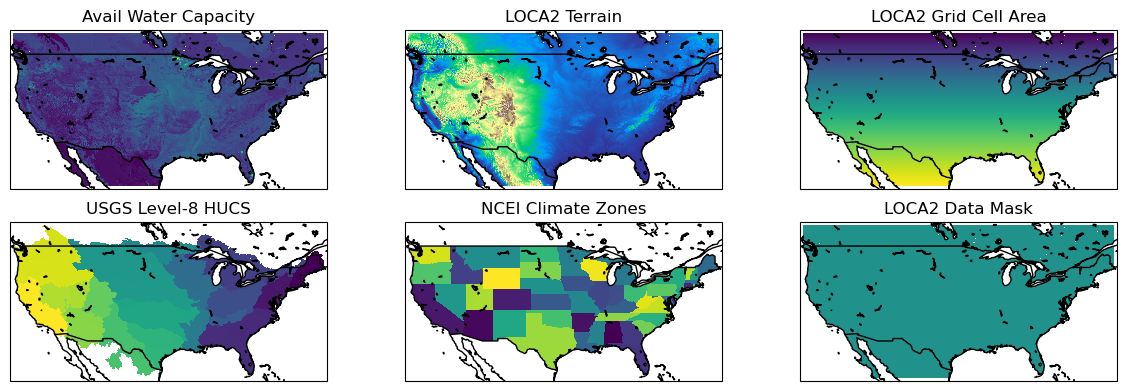

In [4]:
fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(2,3,1,
                      projection = ccrs.PlateCarree())

ax2 = fig.add_subplot(2,3,2,
                      projection = ccrs.PlateCarree())

ax3 = fig.add_subplot(2,3,4,
                      projection = ccrs.PlateCarree())

ax4 = fig.add_subplot(2,3,5,
                      projection = ccrs.PlateCarree())

ax5 = fig.add_subplot(2,3,3,
                      projection = ccrs.PlateCarree())

ax6 = fig.add_subplot(2,3,6,
                      projection = ccrs.PlateCarree())


AWC_Grid.plot(ax           =   ax1,
              add_colorbar = False)
ax1.set_title("Avail Water Capacity")
ax1.add_feature(feature = cfeature.COASTLINE)
ax1.add_feature(feature = cfeature.BORDERS)
ax1.add_feature(feature = cfeature.LAKES, 
                edgecolor='black', 
                facecolor='none')

HSFC_Grid.plot(ax           =   ax2,
               add_colorbar = False,
               cmap = "terrain",
               vmin = 0)
ax2.set_title("LOCA2 Terrain")
ax2.add_feature(feature = cfeature.COASTLINE)
ax2.add_feature(feature = cfeature.BORDERS)
ax2.add_feature(feature = cfeature.LAKES, 
                edgecolor='black', 
                facecolor='none')

HUC_Grid.plot(ax           =   ax3,
              add_colorbar = False)
ax3.set_title("USGS Level-8 HUCS")
ax3.add_feature(feature = cfeature.COASTLINE)
ax3.add_feature(feature = cfeature.BORDERS)
ax3.add_feature(feature = cfeature.LAKES, 
                edgecolor='black', 
                facecolor='none')

CD_Grid.plot(ax           =   ax4,
              add_colorbar = False)
ax4.set_title("NCEI Climate Zones")
ax4.add_feature(feature = cfeature.COASTLINE)
ax4.add_feature(feature = cfeature.BORDERS)
ax4.add_feature(feature = cfeature.LAKES, 
                edgecolor='black', 
                facecolor='none')

cell_area.plot(ax           =   ax5,
              add_colorbar = False)
ax5.set_title("LOCA2 Grid Cell Area")
ax5.add_feature(feature = cfeature.COASTLINE)
ax5.add_feature(feature = cfeature.BORDERS)
ax5.add_feature(feature = cfeature.LAKES, 
                edgecolor='black', 
                facecolor='none')

Mask_Grid.plot(ax           =   ax6,
              add_colorbar = False)
ax6.set_title("LOCA2 Data Mask")
ax6.add_feature(feature = cfeature.COASTLINE)
ax6.add_feature(feature = cfeature.BORDERS)
ax6.add_feature(feature = cfeature.LAKES, 
                edgecolor='black', 
                facecolor='none')

plt.tight_layout()

plt.show()

## Scroll through Pandas Climate Division table and calculate AWC fields

In [5]:
CD_table = pd.read_csv(filepath_or_buffer = "./NCEI_nClimDiv_LUT.csv", 
                       index_col          =                 "climdiv")

CD_table[              "climdiv_mean_mass_content_of_water_in_soil"] = np.float32(0)
CD_table["climdiv_standard_deviation_mass_content_of_water_in_soil"] = np.float32(0)
CD_table[          "climdiv_area_for_mass_content_of_water_in_soil"] = np.float32(0)

CD_table[              "climdiv_mean_surface_elevation"] = np.float32(0)
CD_table["climdiv_standard_deviation_surface_elevation"] = np.float32(0)
CD_table[          "climdiv_area_for_surface_elevation"] = np.float32(0)


CD_table["climdiv_mean_longitude"] = np.float32(0)
CD_table[ "climdiv_mean_latitude"] = np.float32(0)

for index, row in CD_table.iterrows():

    ##### AWC


    mask_on = Mask_Grid.where((CD_Grid == index) & (AWC_Grid > -1))

    masked = mask_on*AWC_Grid
    np.nan_to_num(x      = masked, 
                  copy   =      False, 
                  nan    =        0.0, 
                  posinf =        0.0, 
                  neginf =        0.0)

    area = (mask_on*cell_area).sum().values[()]

    mask_on =  mask_on*cell_area/area
    np.nan_to_num(x      =    mask_on, 
                  copy   =      False, 
                  nan    =        0.0, 
                  posinf =        0.0, 
                  neginf =        0.0)
    
    n = np.count_nonzero(mask_on)
                     
    avg  = np.average(masked,          weights=mask_on)
    stdv = np.average((masked-avg)**2, weights=mask_on)
    CD_table.loc[index, "climdiv_mean_mass_content_of_water_in_soil"]               = np.float32(avg)
    CD_table.loc[index, "climdiv_standard_deviation_mass_content_of_water_in_soil"] = np.float32(np.sqrt(stdv*n/(n-1)))
    CD_table.loc[index,           "climdiv_area_for_mass_content_of_water_in_soil"] = np.float32(area)

    ##### ZSfc

    mask_on = Mask_Grid.where((CD_Grid == index) & (HSFC_Grid > -1))

    masked = mask_on*HSFC_Grid
    np.nan_to_num(x      = masked, 
                  copy   =      False, 
                  nan    =        0.0, 
                  posinf =        0.0, 
                  neginf =        0.0)

    area = (mask_on*cell_area).sum().values[()]

    mask_on =  mask_on*cell_area/area
    np.nan_to_num(x      =    mask_on, 
                  copy   =      False, 
                  nan    =        0.0, 
                  posinf =        0.0, 
                  neginf =        0.0)
    
    n = np.count_nonzero(mask_on)
                     
    avg  = np.average(masked,          weights=mask_on)
    stdv = np.average((masked-avg)**2, weights=mask_on)
    CD_table.loc[index,               "climdiv_mean_surface_elevation"] = np.float32(avg)
    CD_table.loc[index, "climdiv_standard_deviation_surface_elevation"] = np.float32(np.sqrt(stdv*n/(n-1)))
    CD_table.loc[index,           "climdiv_area_for_surface_elevation"] = np.float32(area)

    ##### Long

    mask_on = Mask_Grid.where((CD_Grid == index) & (Mask_Grid ==1))

    masked = mask_on*boxlo
    np.nan_to_num(x      = masked, 
                  copy   =      False, 
                  nan    =        0.0, 
                  posinf =        0.0, 
                  neginf =        0.0)

    area = (mask_on*cell_area).sum().values[()]

    mask_on =  mask_on*cell_area/area
    np.nan_to_num(x      =    mask_on, 
                  copy   =      False, 
                  nan    =        0.0, 
                  posinf =        0.0, 
                  neginf =        0.0)
    
    n = np.count_nonzero(mask_on)
                     
    avg  = np.average(masked, weights=mask_on)
    CD_table.loc[index,"climdiv_mean_longitude"] = np.float32(avg*180./np.pi)

    ##### Lat

    mask_on = Mask_Grid.where((CD_Grid == index) & (Mask_Grid == 1))

    masked = mask_on*boxla
    np.nan_to_num(x      =     masked, 
                  copy   =      False, 
                  nan    =        0.0, 
                  posinf =        0.0, 
                  neginf =        0.0)

    area = (mask_on*cell_area).sum().values[()]

    mask_on =  mask_on*cell_area/area
    np.nan_to_num(x      =    mask_on, 
                  copy   =      False, 
                  nan    =        0.0, 
                  posinf =        0.0, 
                  neginf =        0.0)
    
    n = np.count_nonzero(mask_on)
                     
    avg  = np.average(masked,          weights=mask_on)
    CD_table.loc[index,"climdiv_mean_latitude"] = np.float32(avg*180./np.pi)
    
CD_table.index.name = "climdiv"
display(CD_table)
CD_xarray = CD_table.to_xarray()
CD_table.to_csv("./CD_stats.csv")


,climdiv_state_code,cdnew,state_fips,fips_cd,climdiv_name,climdiv_state_abrv,climdiv_state_name,climdiv_mean_mass_content_of_water_in_soil,climdiv_standard_deviation_mass_content_of_water_in_soil,climdiv_area_for_mass_content_of_water_in_soil,climdiv_mean_surface_elevation,climdiv_standard_deviation_surface_elevation,climdiv_area_for_surface_elevation,climdiv_mean_longitude,climdiv_mean_latitude
climdiv,,,,,,,,,,,,,,,
101,1,1,1,101,Northern Valley,AL,Alabama,167.402985,36.358162,2.452518e+10,198.308960,37.393009,2.452518e+10,-87.264107,34.664509
102,1,2,1,102,Appalachian Mountain,AL,Alabama,123.325958,24.550142,2.673931e+10,237.646957,87.296120,2.673931e+10,-86.405220,34.209763
103,1,3,1,103,Upper Plains,AL,Alabama,170.643646,49.394608,3.957884e+10,123.106033,47.929325,3.957884e+10,-87.477379,33.448208
104,1,4,1,104,Eastern Valley,AL,Alabama,161.422379,27.910069,2.029942e+10,188.753967,41.870296,2.029942e+10,-86.128899,33.686821
105,1,5,1,105,Piedmont Plateau,AL,Alabama,163.656097,28.725683,2.646817e+10,208.288696,70.651642,2.646817e+10,-85.742073,33.000534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,48,6,56,5606,Belle Fourche Drainage,WY,Wyoming,163.400543,28.972363,2.022931e+10,1369.666504,165.558060,2.022931e+10,-104.851776,44.305733
4807,48,7,56,5607,Cheyenne & Niobrara Drainage,WY,Wyoming,150.365372,24.748579,3.800366e+10,1401.929810,144.629211,3.800366e+10,-104.838409,43.365932
4808,48,8,56,5608,Lower Platte,WY,Wyoming,138.690186,45.024029,6.790200e+10,1728.737305,288.757294,6.790200e+10,-105.257767,42.139397


## Scroll through Pandas HUC-08 table and calculate AWC fields

In [6]:
HUC_table = pd.read_csv(filepath_or_buffer = "./USGS_HUC08_LUT.csv", 
                        index_col           =               "huc08")

HUC_table[              "huc08_mean_mass_content_of_water_in_soil"] = np.float32(0)
HUC_table["huc08_standard_deviation_mass_content_of_water_in_soil"] = np.float32(0)
HUC_table[          "huc08_area_for_mass_content_of_water_in_soil"] = np.float32(0)

HUC_table[              "huc08_mean_surface_elevation"] = np.float32(0)
HUC_table["huc08_standard_deviation_surface_elevation"] = np.float32(0)
HUC_table[          "huc08_area_for_surface_elevation"] = np.float32(0)

HUC_table["huc08_mean_longitude"] = np.float32(0)
HUC_table[ "huc08_mean_latitude"] = np.float32(0)

for index, row in HUC_table.iterrows():

    mask_on = Mask_Grid.where((HUC_Grid == index) & (AWC_Grid > -1) & (Mask_Grid ==1))

    masked = mask_on*AWC_Grid
    np.nan_to_num(x      = masked, 
                  copy   =      False, 
                  nan    =        0.0, 
                  posinf =        0.0, 
                  neginf =        0.0)

    area = (mask_on*cell_area).sum().values[()]
    HUC_table.loc[index, "huc08_area_for_mass_content_of_water_in_soil"] = np.float32(area)

    if (area > 0):

        mask_on =  mask_on*cell_area/area
        np.nan_to_num(x      = mask_on, 
                      copy   =      False, 
                      nan    =        0.0, 
                      posinf =        0.0, 
                      neginf =        0.0)
        
        n = np.count_nonzero(mask_on)
        if (n==1):
            print("Single Gridcell for ", index, HUC_table.loc[index, "huc08_name"], area, n)

        avg  = np.average(masked,          weights=mask_on)
        if (n > 1):
            stdv = np.average((masked-avg)**2, weights=mask_on)
        HUC_table.loc[index, "huc08_mean_mass_content_of_water_in_soil"]               = np.float32(avg)
        if (n > 1):
            HUC_table.loc[index, "huc08_standard_deviation_mass_content_of_water_in_soil"] = np.float32(np.sqrt(stdv*n/(n-1)))

    else:
        print("xDud Area for ", index, HUC_table.loc[index, "huc08_name"], area)

    ### Elevation
    
    mask_on = Mask_Grid.where((HUC_Grid == index) & (HSFC_Grid > -1) & (Mask_Grid ==1))

    masked = mask_on*HSFC_Grid
    np.nan_to_num(x      = masked, 
                  copy   =      False, 
                  nan    =        0.0, 
                  posinf =        0.0, 
                  neginf =        0.0)

    area = (mask_on*cell_area).sum().values[()]
    HUC_table.loc[index,           "huc08_area_for_surface_elevation"] = np.float32(area)

    if (area > 0):
    
        mask_on =  mask_on*cell_area/area
        np.nan_to_num(x      = mask_on, 
                      copy   =      False, 
                      nan    =        0.0, 
                      posinf =        0.0, 
                      neginf =        0.0)
    
        n = np.count_nonzero(mask_on)
                         
        avg  = np.average(masked,          weights=mask_on)
        if (n > 1):
            stdv = np.average((masked-avg)**2, weights=mask_on)
        HUC_table.loc[index,               "huc08_mean_surface_elevation"] = np.float32(avg)
        if (n > 1):
            HUC_table.loc[index, "huc08_standard_deviation_surface_elevation"] = np.float32(np.sqrt(stdv*n/(n-1)))

    ##### Long

    mask_on = Mask_Grid.where((HUC_Grid == index) & (Mask_Grid ==1))

    masked = mask_on*boxlo
    np.nan_to_num(x      = masked, 
                  copy   =      False, 
                  nan    =        0.0, 
                  posinf =        0.0, 
                  neginf =        0.0)

    area = (mask_on*cell_area).sum().values[()]

    if (area > 0):

        mask_on =  mask_on*cell_area/area
        np.nan_to_num(x      = mask_on, 
                      copy   =      False, 
                      nan    =        0.0, 
                      posinf =        0.0, 
                      neginf =        0.0)
        n = np.count_nonzero(mask_on)
                         
        avg  = np.average(masked, weights=mask_on)
        HUC_table.loc[index,"huc08_mean_longitude"] = np.float32(avg*180./np.pi)

    ##### Lat

    mask_on = Mask_Grid.where((HUC_Grid == index) & (Mask_Grid == 1))

    masked = mask_on*boxla
    np.nan_to_num(x      =     masked, 
                  copy   =      False, 
                  nan    =        0.0, 
                  posinf =        0.0, 
                  neginf =        0.0)

    area = (mask_on*cell_area).sum().values[()]
    
    if (area > 0):

        mask_on =  mask_on*cell_area/area
        np.nan_to_num(x      = mask_on, 
                      copy   =      False, 
                      nan    =        0.0, 
                      posinf =        0.0, 
                      neginf =        0.0)
    
        n = np.count_nonzero(mask_on)
                         
        avg  = np.average(masked,          weights=mask_on)
        HUC_table.loc[index,"huc08_mean_latitude"] = np.float32(avg*180./np.pi)

HUC_table.index.name = "huc08"
display(HUC_table)
HUC_xarray = HUC_table.to_xarray()
HUC_table = HUC_table.to_csv("./HUC_stats.csv")

,huc06,huc04,huc02,huc08_name,huc08_state,huc06_name,huc04_name,huc02_name,huc08_mean_mass_content_of_water_in_soil,huc08_standard_deviation_mass_content_of_water_in_soil,huc08_area_for_mass_content_of_water_in_soil,huc08_mean_surface_elevation,huc08_standard_deviation_surface_elevation,huc08_area_for_surface_elevation,huc08_mean_longitude,huc08_mean_latitude
huc08,,,,,,,,,,,,,,,,
1010009,10100,101,1,Little River-Saint John River,"CN,ME",St. John,St. John,New England Region,130.693390,32.283924,1.167016e+10,262.862701,81.881935,1.167016e+10,-67.954964,47.371819
1010011,10100,101,1,Keswick River-Saint John River,"CN,ME",St. John,St. John,New England Region,119.736481,7.953358,5.172179e+09,137.016571,54.347458,5.172179e+09,-67.355965,46.065891
1010004,10100,101,1,Aroostook River,"CN,ME",St. John,St. John,New England Region,221.065781,21.633654,1.209308e+10,235.874603,67.693138,1.209308e+10,-68.475922,46.658550
1010005,10100,101,1,Meduxnekeag River,"CN,ME",St. John,St. John,New England Region,188.458572,25.142635,1.807611e+09,181.876312,61.682316,1.807611e+09,-67.963997,46.248623
1010008,10100,101,1,Saint Francis River-Saint John River,"CN,ME",St. John,St. John,New England Region,132.420074,36.696915,1.385073e+10,268.053284,71.719925,1.385073e+10,-68.865913,47.555679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18030010,180300,1803,18,Upper King,CA,Tulare-Buena Vista Lakes,Tulare-Buena Vista Lakes,California Region,81.384384,31.651022,6.814823e+09,2117.732422,835.541565,6.814823e+09,-118.815117,36.878307
18040006,180400,1804,18,Upper San Joaquin,CA,San Joaquin,San Joaquin,California Region,92.700752,34.853245,8.396487e+09,1871.915039,936.259827,8.396487e+09,-119.213150,37.279736
18040014,180400,1804,18,Panoche-San Luis Reservoir,CA,San Joaquin,San Joaquin,California Region,165.243423,39.317959,1.787833e+09,428.488983,200.805603,1.787833e+09,-120.737755,36.590939


In [7]:

CD_xarray["climdiv"].attrs["long_name"]   = "NCEI Climate Division Code"
CD_xarray["climdiv"].attrs["description"] = "NCEI Climate Division Code"

CD_xarray["climdiv_mean_mass_content_of_water_in_soil"].attrs["long_name"]     = "Mean Available Soil Water Capacity for NCEI Climate Divisions"
CD_xarray["climdiv_mean_mass_content_of_water_in_soil"].attrs["description"]   = "Mean Available Soil Water Capacity for NCEI Climate Divisions"
CD_xarray["climdiv_mean_mass_content_of_water_in_soil"].attrs["standard_name"] = "mass_content_of_water_in_soil"
CD_xarray["climdiv_mean_mass_content_of_water_in_soil"].attrs["units"]         = "kg m-2"
CD_xarray["climdiv_mean_mass_content_of_water_in_soil"].attrs["cell_methods"]  = "climdiv: mean"

CD_xarray["climdiv_standard_deviation_mass_content_of_water_in_soil"].attrs["long_name"]     = "St Dev Available Soil Water Capacity for NCEI Climate Divisions"
CD_xarray["climdiv_standard_deviation_mass_content_of_water_in_soil"].attrs["description"]   = "St Dev Available Soil Water Capacity for NCEI Climate Divisions"
CD_xarray["climdiv_standard_deviation_mass_content_of_water_in_soil"].attrs["standard_name"] = "mass_content_of_water_in_soil"
CD_xarray["climdiv_standard_deviation_mass_content_of_water_in_soil"].attrs["units"]         = "kg m-2"
CD_xarray["climdiv_standard_deviation_mass_content_of_water_in_soil"].attrs["cell_methods"]  = "climdiv: standard_deviation"

CD_xarray["climdiv_area_for_mass_content_of_water_in_soil"].attrs["long_name"]     = "Contributing Area for Available Soil Water Capacity for NCEI Climate Divisions"
CD_xarray["climdiv_area_for_mass_content_of_water_in_soil"].attrs["description"]   = "Contributing Area for Available Soil Water Capacity for NCEI Climate Divisions"
CD_xarray["climdiv_area_for_mass_content_of_water_in_soil"].attrs["units"]         = "m2"
CD_xarray["climdiv_area_for_mass_content_of_water_in_soil"].attrs["cell_methods"]  = "climdiv: sum"


CD_xarray["climdiv_mean_surface_elevation"].attrs["long_name"]     = "Mean Surface Elevation for NCEI Climate Divisions"
CD_xarray["climdiv_mean_surface_elevation"].attrs["description"]   = "Mean Surface Elevation for NCEI Climate Divisions"
CD_xarray["climdiv_mean_surface_elevation"].attrs["standard_name"] = "surface_elevation"
CD_xarray["climdiv_mean_surface_elevation"].attrs["units"]         = "m"
CD_xarray["climdiv_mean_surface_elevation"].attrs["cell_methods"]  = "climdiv: mean"

CD_xarray["climdiv_standard_deviation_surface_elevation"].attrs["long_name"]     = "St Dev Surface Elevation for NCEI Climate Divisions"
CD_xarray["climdiv_standard_deviation_surface_elevation"].attrs["description"]   = "St Dev Surface Elevation for NCEI Climate Divisions"
CD_xarray["climdiv_standard_deviation_surface_elevation"].attrs["standard_name"] =  "surface_elevation"
CD_xarray["climdiv_standard_deviation_surface_elevation"].attrs["units"]         = "m"
CD_xarray["climdiv_standard_deviation_surface_elevation"].attrs["cell_methods"]  = "climdiv: standard_deviation"

CD_xarray["climdiv_area_for_surface_elevation"].attrs["long_name"]     = "Contributing Area for Surface Elevation for NCEI Climate Divisions"
CD_xarray["climdiv_area_for_surface_elevation"].attrs["description"]   = "Contributing Area for Surface Elevation for NCEI Climate Divisions"
CD_xarray["climdiv_area_for_surface_elevation"].attrs["units"]         = "m2"
CD_xarray["climdiv_area_for_surface_elevation"].attrs["cell_methods"]  = "climdiv: sum"

CD_xarray["climdiv_mean_longitude"].attrs["long_name"]     = "Mean Longitude for NCEI Climate Divisions"
CD_xarray["climdiv_mean_longitude"].attrs["description"]   = "Mean Longitude for NCEI Climate Divisions"
CD_xarray["climdiv_mean_longitude"].attrs["standard_name"] = "longitude"
CD_xarray["climdiv_mean_longitude"].attrs["units"]         = "degrees_east"
CD_xarray["climdiv_mean_longitude"].attrs["cell_methods"]  = "climdiv: mean"


CD_xarray["climdiv_mean_latitude"].attrs["long_name"]     = "Mean Latitude for NCEI Climate Divisions"
CD_xarray["climdiv_mean_latitude"].attrs["description"]   = "Mean Latitude for NCEI Climate Divisions"
CD_xarray["climdiv_mean_latitude"].attrs["standard_name"] = "latitude"
CD_xarray["climdiv_mean_latitude"].attrs["units"]         = "degrees_north"
CD_xarray["climdiv_mean_latitude"].attrs["cell_methods"]  = "climdiv: mean"

CD_xarray["fips_cd"].attrs["long_name"]     = "NCEI Climate Division FIPS Code"
CD_xarray["fips_cd"].attrs["description"]   = "NCEI Climate Division FIPS Code"

CD_xarray["cdnew"].attrs["long_name"]     = "NCEI Climate Division In-State 2-Digit Code"
CD_xarray["cdnew"].attrs["description"]   = "NCEI Climate Division In-State 2-Digit Code"

CD_xarray["cdnew"].attrs["long_name"]     = "NCEI Climate Division In-State 2-Digit Code"
CD_xarray["cdnew"].attrs["description"]   = "NCEI Climate Division In-State 2-Digit Code"

CD_xarray["state_fips"].attrs["long_name"]     = "US State FIPS Code"
CD_xarray["state_fips"].attrs["description"]   = "US State FIPS Code"

CD_xarray["climdiv_name"].attrs["long_name"]     = "NCEI Climate Division Name"
CD_xarray["climdiv_name"].attrs["description"]   = "NCEI Climate Division Name"

CD_xarray["climdiv_state_code"].attrs["long_name"]     = "NCEI Climate Division State Code"
CD_xarray["climdiv_state_code"].attrs["description"]   = "NCEI Climate Division State Code"



CD_xarray["climdiv_state_abrv"].attrs["long_name"]     = "NCEI Climate Division State Abbreviation"
CD_xarray["climdiv_state_abrv"].attrs["description"]   = "NCEI Climate Division State Abbreviation"

CD_xarray["climdiv_state_name"].attrs["long_name"]     = "NCEI Climate Division State Name"
CD_xarray["climdiv_state_name"].attrs["description"]   = "NCEI Climate Division State Name"

CD_xarray

<xarray.Dataset> Size: 33kB
Dimensions:                                                   (climdiv: 344)
Coordinates:
  * climdiv                                                   (climdiv) int64 3kB ...
Data variables: (12/15)
    climdiv_state_code                                        (climdiv) int64 3kB ...
    cdnew                                                     (climdiv) int64 3kB ...
    state_fips                                                (climdiv) int64 3kB ...
    fips_cd                                                   (climdiv) int64 3kB ...
    climdiv_name                                              (climdiv) object 3kB ...
    climdiv_state_abrv                                        (climdiv) object 3kB ...
    ...                                                        ...
    climdiv_area_for_mass_content_of_water_in_soil            (climdiv) float32 1kB ...
    climdiv_mean_surface_elevation                            (climdiv) float32 1kB ...
    climdiv_standard_deviation_surface_elevation              (climdiv) float32 1kB ...
    climdiv_area_for_surface_elevation                        (climdiv) float32 1kB ...
    climdiv_mean_longitude                                    (climdiv) float32 1kB ...
    climdiv_mean_latitude                                     (climdiv) float32 1kB ...

In [8]:



HUC_xarray["huc08"].attrs["long_name"]   = "USGS Hydrologic Unit Level 8 Codes"
HUC_xarray["huc08"].attrs["description"] = "USGS Hydrologic Unit Level 8 Codes"

HUC_xarray["huc02"].attrs["long_name"]     = "USGS Hydrologic Unit Level 2 Codes"
HUC_xarray["huc02"].attrs["description"]   = "USGS Hydrologic Unit Level 2 Codes"

HUC_xarray["huc04"].attrs["long_name"]     = "USGS Hydrologic Unit Level 4 Codes"
HUC_xarray["huc04"].attrs["description"]   = "USGS Hydrologic Unit Level 4 Codes"

HUC_xarray["huc06"].attrs["long_name"]     = "USGS Hydrologic Unit Level 6 Codes"
HUC_xarray["huc06"].attrs["description"]   = "USGS Hydrologic Unit Level 6 Codes"


HUC_xarray["huc08_name"].attrs["long_name"]     = "USGS Hydrologic Unit Level 8 Basin Name"
HUC_xarray["huc08_name"].attrs["description"]   = "USGS Hydrologic Unit Level 8 Basin Name"

HUC_xarray["huc08_state"].attrs["long_name"]    = "USGS Hydrologic Unit Level 8 Basin States"
HUC_xarray["huc08_state"].attrs["description"]  = "USGS Hydrologic Unit Level 8 Basin States"

HUC_xarray["huc02_name"].attrs["long_name"]     = "USGS Hydrologic Unit Level 2 Basin Name"
HUC_xarray["huc02_name"].attrs["description"]   = "USGS Hydrologic Unit Level 2 Basin Name"

HUC_xarray["huc04_name"].attrs["long_name"]     = "USGS Hydrologic Unit Level 4 Basin Name"
HUC_xarray["huc04_name"].attrs["description"]   = "USGS Hydrologic Unit Level 4 Basin Name"

HUC_xarray["huc06_name"].attrs["long_name"]     = "USGS Hydrologic Unit Level 6 Basin Name"
HUC_xarray["huc06_name"].attrs["description"]   = "USGS Hydrologic Unit Level 6 Basin Name"


HUC_xarray["huc08_mean_mass_content_of_water_in_soil"].attrs["long_name"]     = "Mean Available Soil Water Capacity for USGS Hydrologic Unit Level 8 Basin"
HUC_xarray["huc08_mean_mass_content_of_water_in_soil"].attrs["description"]   = "Mean Available Soil Water Capacity for USGS Hydrologic Unit Level 8 Basin"
HUC_xarray["huc08_mean_mass_content_of_water_in_soil"].attrs["standard_name"] = "mass_content_of_water_in_soil"
HUC_xarray["huc08_mean_mass_content_of_water_in_soil"].attrs["units"]         = "kg m-2"
HUC_xarray["huc08_mean_mass_content_of_water_in_soil"].attrs["cell_methods"]  = "huc08: mean"

HUC_xarray["huc08_standard_deviation_mass_content_of_water_in_soil"].attrs["long_name"]     = "St Dev Available Soil Water Capacity for USGS Hydrologic Unit Level 8 Basin"
HUC_xarray["huc08_standard_deviation_mass_content_of_water_in_soil"].attrs["description"]   = "St Dev Available Soil Water Capacity for USGS Hydrologic Unit Level 8 Basin"
HUC_xarray["huc08_standard_deviation_mass_content_of_water_in_soil"].attrs["standard_name"] = "mass_content_of_water_in_soil"
HUC_xarray["huc08_standard_deviation_mass_content_of_water_in_soil"].attrs["units"]         = "kg m-2"
HUC_xarray["huc08_standard_deviation_mass_content_of_water_in_soil"].attrs["cell_methods"]  = "huc08: standard_deviation"

HUC_xarray["huc08_area_for_mass_content_of_water_in_soil"].attrs["long_name"]     = "Contributing Area for Available Soil Water Capacity for USGS Hydrologic Unit Level 8 Basin"
HUC_xarray["huc08_area_for_mass_content_of_water_in_soil"].attrs["description"]   = "Contributing Area for Available Soil Water Capacity for USGS Hydrologic Unit Level 8 Basin"
HUC_xarray["huc08_area_for_mass_content_of_water_in_soil"].attrs["units"]         = "m2"
HUC_xarray["huc08_area_for_mass_content_of_water_in_soil"].attrs["cell_methods"]  = "huc08: sum"

HUC_xarray["huc08_mean_surface_elevation"].attrs["long_name"]     = "Mean Surface Elevation for USGS Hydrologic Unit Level 8 Basin"
HUC_xarray["huc08_mean_surface_elevation"].attrs["description"]   = "Mean Surface Elevation for USGS Hydrologic Unit Level 8 Basin"
HUC_xarray["huc08_mean_surface_elevation"].attrs["standard_name"] = "surface_elevation"
HUC_xarray["huc08_mean_surface_elevation"].attrs["units"]         = "m"
HUC_xarray["huc08_mean_surface_elevation"].attrs["cell_methods"]  = "huc08: mean"

HUC_xarray["huc08_standard_deviation_surface_elevation"].attrs["long_name"]     = "St Dev Surface Elevation for USGS Hydrologic Unit Level 8 Basin"
HUC_xarray["huc08_standard_deviation_surface_elevation"].attrs["description"]   = "St Dev Surface Elevation for USGS Hydrologic Unit Level 8 Basin"
HUC_xarray["huc08_standard_deviation_surface_elevation"].attrs["standard_name"] =  "surface_elevation"
HUC_xarray["huc08_standard_deviation_surface_elevation"].attrs["units"]         = "m"
HUC_xarray["huc08_standard_deviation_surface_elevation"].attrs["cell_methods"]  = "huc08: standard_deviation"

HUC_xarray["huc08_area_for_surface_elevation"].attrs["long_name"]     = "Contributing Area for Surface Elevation for USGS Hydrologic Unit Level 8 Basin"
HUC_xarray["huc08_area_for_surface_elevation"].attrs["description"]   = "Contributing Area for Surface Elevation for USGS Hydrologic Unit Level 8 Basin"
HUC_xarray["huc08_area_for_surface_elevation"].attrs["units"]         = "m2"
HUC_xarray["huc08_area_for_surface_elevation"].attrs["cell_methods"]  = "huc08: sum"



HUC_xarray["huc08_mean_longitude"].attrs["long_name"]     = "Mean Longitude for USGS Hydrologic Unit Level 8 Basin"
HUC_xarray["huc08_mean_longitude"].attrs["description"]   = "Mean Longitude for USGS Hydrologic Unit Level 8 Basin"
HUC_xarray["huc08_mean_longitude"].attrs["standard_name"] = "longitude"
HUC_xarray["huc08_mean_longitude"].attrs["units"]         = "degrees_east"
HUC_xarray["huc08_mean_longitude"].attrs["cell_methods"]  = "huc08: mean"

HUC_xarray["huc08_mean_latitude"].attrs["long_name"]     = "Mean Latitude for USGS Hydrologic Unit Level 8 Basin"
HUC_xarray["huc08_mean_latitude"].attrs["description"]   = "Mean Latitude for USGS Hydrologic Unit Level 8 Basin"
HUC_xarray["huc08_mean_latitude"].attrs["standard_name"] = "latitude"
HUC_xarray["huc08_mean_latitude"].attrs["units"]         = "degrees_north"
HUC_xarray["huc08_mean_latitude"].attrs["cell_methods"]  = "huc08: mean"


HUC_xarray

<xarray.Dataset> Size: 227kB
Dimensions:                                                 (huc08: 2181)
Coordinates:
  * huc08                                                   (huc08) int64 17kB ...
Data variables: (12/16)
    huc06                                                   (huc08) int64 17kB ...
    huc04                                                   (huc08) int64 17kB ...
    huc02                                                   (huc08) int64 17kB ...
    huc08_name                                              (huc08) object 17kB ...
    huc08_state                                             (huc08) object 17kB ...
    huc06_name                                              (huc08) object 17kB ...
    ...                                                      ...
    huc08_area_for_mass_content_of_water_in_soil            (huc08) float32 9kB ...
    huc08_mean_surface_elevation                            (huc08) float32 9kB ...
    huc08_standard_deviation_surface_elevation              (huc08) float32 9kB ...
    huc08_area_for_surface_elevation                        (huc08) float32 9kB ...
    huc08_mean_longitude                                    (huc08) float32 9kB ...
    huc08_mean_latitude                                     (huc08) float32 9kB ...

In [9]:
xf2 = xr.merge([xf,HUC_xarray, CD_xarray])

xf2.to_netcdf(path     = "./LOCA2_MASKS.nc",
              encoding = {"huc08":                         {"dtype":  "int32", "_FillValue": np.int32(0)},
                          "climdiv":                       {"dtype":  "int32", "_FillValue": np.int32(0)},
                          "lon":                           {"dtype":"float64", "_FillValue": np.float64(9.9692099683868690e+36)},
                          "lat":                           {"dtype":"float64", "_FillValue": np.float64(9.9692099683868690e+36)},
                          "lon_bounds":                    {"dtype":"float64", "_FillValue": np.float64(9.9692099683868690e+36)},
                          "lat_bounds":                    {"dtype":"float64", "_FillValue": np.float64(9.9692099683868690e+36)},
                          "LOCA2_MASK":                    {"dtype":  "int32", "_FillValue": np.int32(0)},
                          "LOCA2_CLIMDIV":                 {"dtype":  "int32", "_FillValue": np.int32(0)},
                          "LOCA2_HUC08":                   {"dtype":  "int32", "_FillValue": np.int32(0)},
                          "mass_content_of_water_in_soil": {"dtype":"float32", "_FillValue": np.float32(9.9692099683868690e+36)},
                          "surface_altitude":              {"dtype":"float32", "_FillValue": np.float32(9.9692099683868690e+36)},
                          "cell_area":                     {"dtype":"float32", "_FillValue": np.float32(9.9692099683868690e+36)},
                          "huc06":                         {"dtype":  "int32", "_FillValue": np.int32(0)},
                          "huc04":                         {"dtype":  "int32", "_FillValue": np.int32(0)},
                          "huc02":                         {"dtype":  "int32", "_FillValue": np.int32(0)},
                          "climdiv_state_code":            {"dtype":  "int32", "_FillValue": np.int32(0)},
                          "cdnew":                         {"dtype":  "int32", "_FillValue": np.int32(0)},
                          "state_fips":                    {"dtype":  "int32", "_FillValue": np.int32(0)},
                          "fips_cd":                       {"dtype":  "int32", "_FillValue": np.int32(0)},
                          "huc08_mean_mass_content_of_water_in_soil":                 {"dtype":"float32", "_FillValue": np.float32(9.9692099683868690e+36)},
                          "huc08_standard_deviation_mass_content_of_water_in_soil":   {"dtype":"float32", "_FillValue": np.float32(9.9692099683868690e+36)},
                          "huc08_area_for_mass_content_of_water_in_soil":             {"dtype":"float32", "_FillValue": np.float32(9.9692099683868690e+36)},
                          "huc08_mean_surface_elevation":                             {"dtype":"float32", "_FillValue": np.float32(9.9692099683868690e+36)},
                          "huc08_mean_latitude":                                      {"dtype":"float32", "_FillValue": np.float32(9.9692099683868690e+36)},
                          "huc08_mean_longitude":                                     {"dtype":"float32", "_FillValue": np.float32(9.9692099683868690e+36)},
                          "climdiv_mean_mass_content_of_water_in_soil":               {"dtype":"float32", "_FillValue": np.float32(9.9692099683868690e+36)},
                          "climdiv_standard_deviation_mass_content_of_water_in_soil": {"dtype":"float32", "_FillValue": np.float32(9.9692099683868690e+36)},
                          "climdiv_area_for_mass_content_of_water_in_soil":           {"dtype":"float32", "_FillValue": np.float32(9.9692099683868690e+36)},
                          "climdiv_mean_surface_elevation":                           {"dtype":"float32", "_FillValue": np.float32(9.9692099683868690e+36)},
                          "climdiv_mean_latitude":                                    {"dtype":"float32", "_FillValue": np.float32(9.9692099683868690e+36)},
                          "climdiv_mean_longitude":                                   {"dtype":"float32", "_FillValue": np.float32(9.9692099683868690e+36)}})

print("file dropped")
del(xf2)
xf2 = xr.open_dataset(filename_or_obj = "./LOCA2_MASKS.nc", 
                       engine         = "netcdf4")
display(xf2)

file dropped


<xarray.Dataset> Size: 18MB
Dimensions:                                                   (lat: 474,
                                                               lon: 944,
                                                               bnds: 2,
                                                               huc08: 2181,
                                                               climdiv: 344)
Coordinates:
  * lon                                                       (lon) float64 8kB ...
  * lat                                                       (lat) float64 4kB ...
    lat_bounds                                                (lat, bnds) float64 8kB ...
    lon_bounds                                                (lon, bnds) float64 15kB ...
  * huc08                                                     (huc08) float64 17kB ...
  * climdiv                                                   (climdiv) float64 3kB ...
Dimensions without coordinates: bnds
Data variables: (12/37)
    mass_content_of_water_in_soil                             (lat, lon) float32 2MB ...
    LOCA2_HUC08                                               (lat, lon) float64 4MB ...
    LOCA2_CLIMDIV                                             (lat, lon) float64 4MB ...
    LOCA2_MASK                                                (lat, lon) float64 4MB ...
    surface_altitude                                          (lat, lon) float32 2MB ...
    cell_area                                                 (lat, lon) float32 2MB ...
    ...                                                        ...
    climdiv_area_for_mass_content_of_water_in_soil            (climdiv) float32 1kB ...
    climdiv_mean_surface_elevation                            (climdiv) float32 1kB ...
    climdiv_standard_deviation_surface_elevation              (climdiv) float32 1kB ...
    climdiv_area_for_surface_elevation                        (climdiv) float32 1kB ...
    climdiv_mean_longitude                                    (climdiv) float32 1kB ...
    climdiv_mean_latitude                                     (climdiv) float32 1kB ...
Attributes:
    Conventions:  CF-1.11
    title:        LOCA2 Dataset Masks and Tabular Metadata

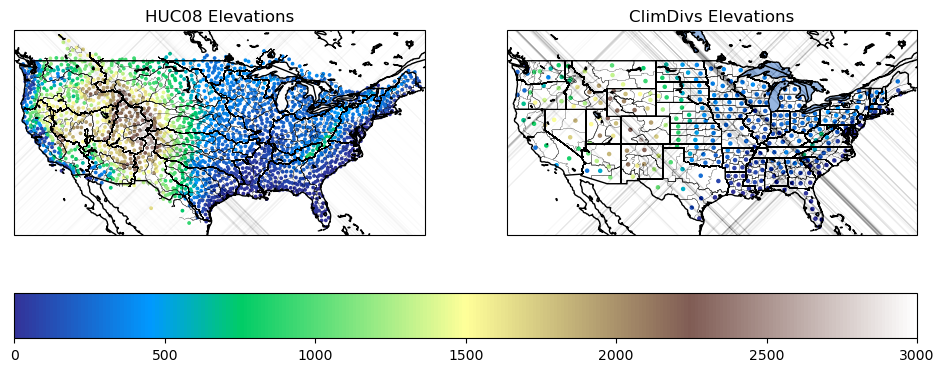

In [10]:
fig = plt.figure(figsize = (18,5))

ax1 = fig.add_subplot(1,3,1,
                      projection = ccrs.PlateCarree())

ax2 = fig.add_subplot(1,3,2,
                      projection = ccrs.PlateCarree())



cm1 = ax1.scatter(xf2["huc08_mean_longitude"],
            xf2["huc08_mean_latitude"], 
            s=3,vmin = 0e3, vmax=3e3,
            c=xf2["huc08_mean_surface_elevation"].values, 
            cmap = "terrain")
xf2["LOCA2_HUC08"].plot.contour(ax=ax1, colors="black", levels=np.arange(0,19,0.01)*100*100*100, linewidths=0.2)
xf2["LOCA2_HUC08"].plot.contour(ax=ax1, colors="black", levels=np.arange(0,19,1)*100*100*100,    linewidths=0.5)
ax1.set_title("HUC08 Elevations")
ax1.add_feature(feature = cfeature.COASTLINE)
ax1.add_feature(feature = cfeature.LAKES, 
                edgecolor='black', 
                facecolor='none')
ax1.add_feature(feature = cfeature.BORDERS)

cm2 = ax2.scatter(xf2["climdiv_mean_longitude"],
            xf2["climdiv_mean_latitude"], 
            s=5, vmin = 0e3, vmax=3e3,
            c=xf2["climdiv_mean_surface_elevation"].values, 
            cmap = "terrain")
xf2["LOCA2_CLIMDIV"].plot.contour(ax=ax2, colors="black", levels=np.arange(0,50,1)*100, linewidths=0.5)
xf2["LOCA2_CLIMDIV"].plot.contour(ax=ax2, colors="black", levels=np.arange(0,50,.01)*100, linewidths=0.2)

ax2.set_title("ClimDivs Elevations")
ax2.add_feature(feature = cfeature.COASTLINE)
ax2.add_feature(feature = cfeature.LAKES)
ax2.add_feature(feature = cfeature.BORDERS)
ax2.add_feature(feature = cfeature.LAKES, 
                edgecolor='black', 
                facecolor='none')

cbar2 = fig.colorbar(cm2, ax=[ax1,ax2],
                     location='bottom')
#plt.tight_layout()
plt.show()


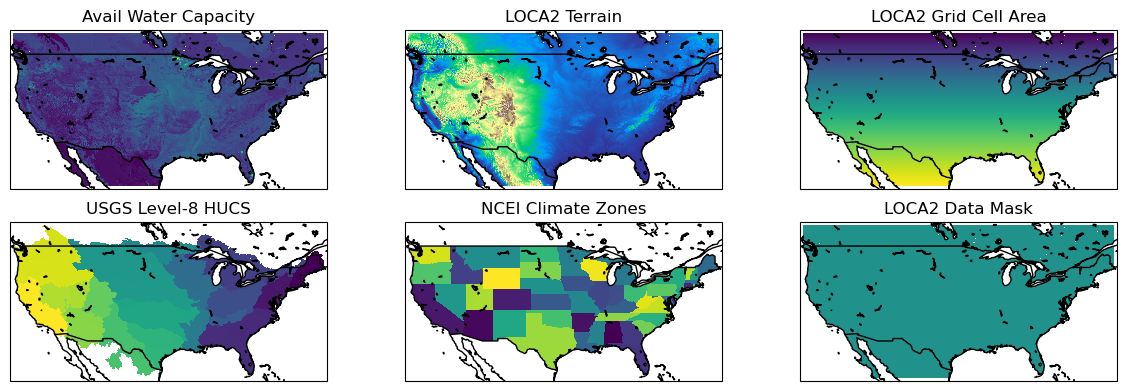

In [12]:



fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(2,3,1,
                      projection = ccrs.PlateCarree())

ax2 = fig.add_subplot(2,3,2,
                      projection = ccrs.PlateCarree())

ax3 = fig.add_subplot(2,3,4,
                      projection = ccrs.PlateCarree())

ax4 = fig.add_subplot(2,3,5,
                      projection = ccrs.PlateCarree())

ax5 = fig.add_subplot(2,3,3,
                      projection = ccrs.PlateCarree())

ax6 = fig.add_subplot(2,3,6,
                      projection = ccrs.PlateCarree())


xf2["mass_content_of_water_in_soil"].plot(ax           =   ax1,
              add_colorbar = False)
ax1.set_title("Avail Water Capacity")
ax1.add_feature(feature = cfeature.COASTLINE)
ax1.add_feature(feature = cfeature.BORDERS)
ax1.add_feature(feature = cfeature.LAKES, 
                edgecolor='black', 
                facecolor='none')

xf2["surface_altitude"].plot(ax           =   ax2,
               add_colorbar = False,
               cmap = "terrain",
               vmin = 0)
ax2.set_title("LOCA2 Terrain")
ax2.add_feature(feature = cfeature.COASTLINE)
ax2.add_feature(feature = cfeature.BORDERS)
ax2.add_feature(feature = cfeature.LAKES, 
                edgecolor='black', 
                facecolor='none')

xf2["LOCA2_HUC08"].plot(ax           =   ax3,
                        add_colorbar = False)
ax3.set_title("USGS Level-8 HUCS")
ax3.add_feature(feature = cfeature.COASTLINE)
ax3.add_feature(feature = cfeature.BORDERS)
ax3.add_feature(feature = cfeature.LAKES, 
                edgecolor='black', 
                facecolor='none')

xf2["LOCA2_CLIMDIV"].plot(ax           =   ax4,
                          add_colorbar = False)
ax4.set_title("NCEI Climate Zones")
ax4.add_feature(feature = cfeature.COASTLINE)
ax4.add_feature(feature = cfeature.BORDERS)
ax4.add_feature(feature = cfeature.LAKES, 
                edgecolor='black', 
                facecolor='none')

xf2["cell_area"].plot(ax           =   ax5,
                      add_colorbar = False)
ax5.set_title("LOCA2 Grid Cell Area")
ax5.add_feature(feature = cfeature.COASTLINE)
ax5.add_feature(feature = cfeature.BORDERS)
ax5.add_feature(feature = cfeature.LAKES, 
                edgecolor='black', 
                facecolor='none')

Mask_Grid.plot(ax           =   ax6,
              add_colorbar = False)
ax6.set_title("LOCA2 Data Mask")
ax6.add_feature(feature = cfeature.COASTLINE)
ax6.add_feature(feature = cfeature.BORDERS)
ax6.add_feature(feature = cfeature.LAKES, 
                edgecolor='black', 
                facecolor='none')

plt.tight_layout()

plt.show()